# Hypothese 3: Video’s waarvan de comments een positief sentiment hebben, vertonen een significante stijging in het aantal views.

Om te analyseren of het sentiment van comments een invloed heeft op het aantal views, wordt een sentimentanalyse uitgevoerd op de verzamelde comments van elke video. Aangezien de comments in het Nederlands zijn en het aantal beperkt is, wordt gekozen voor een kwalitatieve annotatie door de onderzoeker in plaats van een lexicon-gebaseerde methode.

Elke comment wordt handmatig geclassificeerd als positief, neutraal of negatief op basis van de inhoud en toon van de reactie. Hoewel er geen tweede codeerder beschikbaar is om de betrouwbaarheid van de classificatie te controleren, wordt de consistentie gewaarborgd door het opstellen van duidelijke annotatieregels en het toepassen van een systematische beoordelingsmethode. Daarnaast wordt een deel van de dataset op verschillende tijdstippen gehercodeerd door de onderzoeker om intra-codeurbetrouwbaarheid te verhogen.

Vervolgens wordt een Spearman-correlatieanalyse uitgevoerd tussen het percentage positieve comments en het aantal views, om te onderzoeken of er een verband bestaat tussen comment-sentiment en het bereik van video’s. Daarnaast wordt een beschrijvende analyse uitgevoerd, waarbij het gemiddelde aantal positieve, neutrale en negatieve comments per video wordt vergeleken tussen video’s met en zonder CTA.


## Stap 1: Klaarzetten van de notebook.

In deze stap worden alle nodige libraries ingeladen en klaargezet.<br>
Dit vereenvoudigt het verdere verloop van de notebook.

In [1]:
# Importeer standaard libraries
import nltk
import importlib
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Importeer zelfgeschreven libraries en reload bij aanpassingen
from lib import helpers
importlib.reload(helpers);

In [3]:
# Importeer de data
videos = pd.read_excel('../output/videos.xlsx')
comments = pd.read_excel('../output/comments.xlsx', index_col=0)
comments.head()

,id,comment_id,parent_comment_id,author,published_at,like_count,comment_nl,is_reply,comment_en
0,GYtUhykvOos,UgwgDxZ0r0BFkJLKYP14AaABAg,NaN,@UniversiteitvanVlaanderen,2024-12-01T08:59:16Z,2,Voel jij je ook soms eenzaam? Of ben wel vaak ...,False,Do you sometimes feel lonely? Or am often not ...
1,GYtUhykvOos,UgwC9fuK93PSKktjkxh4AaABAg,NaN,User1,2024-12-11T07:33:10Z,2,ik heb ook een verhaal. mijn eenzaamheid is ni...,False,I also have a story. My loneliness is not that...
2,GYtUhykvOos,UgwC9fuK93PSKktjkxh4AaABAg.ABu0SmM1ulIABwrojaD6Sm,UgwC9fuK93PSKktjkxh4AaABAg,@UniversiteitvanVlaanderen,2024-12-12T10:06:38Z,0,Wat een mooi en ook warm verhaal. Dankjewel da...,True,What a beautiful and also warm story. Thank yo...
3,GYtUhykvOos,UgzokIGytUWEUq-xNDZ4AaABAg,NaN,User2,2024-12-08T11:06:17Z,3,Er zijn dus jongeren die zich niet gelukkig vo...,False,So there are young people who don't feel happy...
4,GYtUhykvOos,UgzokIGytUWEUq-xNDZ4AaABAg.ABmfTAkhK-jABws0aLr-Mi,UgzokIGytUWEUq-xNDZ4AaABAg,@UniversiteitvanVlaanderen,2024-12-12T10:08:23Z,2,Dat is zeker iets wat we ook nog eens aan een ...,True,That is certainly something we also have to as...


In [4]:
# Configureer de SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Maak een SentimentIntensityAnalyzer object aan
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tvercamer/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Stap 2: Uitvoeren van de analyses.

In [5]:
# Gebruik VADER op de comment_en om het sentiment te bepalen.
comments['sentiment_score'] = comments['comment_en'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
comments['sentiment_label'] = comments['sentiment_score'].apply(lambda x: 'positief' if x > 0.05 else ('negatief' if x < -0.05 else 'neutraal'))

In [6]:
# Bereken het percentage positieve comments per video
sentiment_counts = comments.groupby('id')['sentiment_label'].value_counts(normalize=True).unstack().fillna(0)
sentiment_counts['percentage_positief'] = (sentiment_counts['positief'] * 100).round(2)
sentiment_counts

sentiment_label,negatief,neutraal,positief,percentage_positief
id,,,,
1QsVq3vlZsk,0.000000,0.600000,0.400000,40.00
4efyusOrx14,0.500000,0.166667,0.333333,33.33
BDq4yJCRFcE,0.111111,0.333333,0.555556,55.56
GYtUhykvOos,0.454545,0.090909,0.454545,45.45
JxWT-zYtcGg,0.500000,0.000000,0.500000,50.00
PUztndRNSU8,0.000000,0.000000,1.000000,100.00
PkmUT16Um_0,0.000000,0.000000,1.000000,100.00
Wm-Yk5bK_fk,0.000000,0.000000,1.000000,100.00
ewUjvz3nDj4,0.250000,0.500000,0.250000,25.00


In [7]:
# Merge sentiment met video data
videos = videos.merge(sentiment_counts[['percentage_positief']], left_on='id', right_index=True)
videos.head()

,id,title,publish_date,duration,views,likes,dislikes,comments,views_24h,views_1w,...,comments_2w,comments_1m,comments_2m,comments_3m,has_CTA,is_beta,university,gender,has_ambassador,percentage_positief
0,GYtUhykvOos,Is het erg als tieners bijna nooit met vriende...,2024-12-01T07:00:09Z,10:59,4127,99,2,13,1860,2682,...,4,4,4.0,4.0,False,NaN,KUL,0,True,45.45
1,PkmUT16Um_0,Hoe kan je helpen als je buur ernstig ziek is?...,2024-12-08T09:00:27Z,16:15,1953,36,0,3,851,1277,...,3,3,3.0,3.0,True,0.0,VUB,0,True,100.00
2,JxWT-zYtcGg,Hoe zorgt Trump ervoor dat we minder eenzaam z...,2024-12-10T06:00:16Z,17:01,2120,40,5,2,831,1415,...,2,2,2.0,2.0,True,0.0,UA,0,False,50.00
3,rJbiY3S69ek,Hoe kan je tijdens een superleuke vakantie toc...,2024-12-15T09:00:48Z,16:27,1136,23,1,1,560,763,...,6,6,6.0,NaN,False,NaN,VUB,0,False,100.00
4,ewUjvz3nDj4,Waarom is een vlam niet vierkant? #dww24,2024-12-17T09:00:40Z,16:46,2023,45,2,4,750,1460,...,5,5,5.0,NaN,True,1.0,UG,1,False,25.00


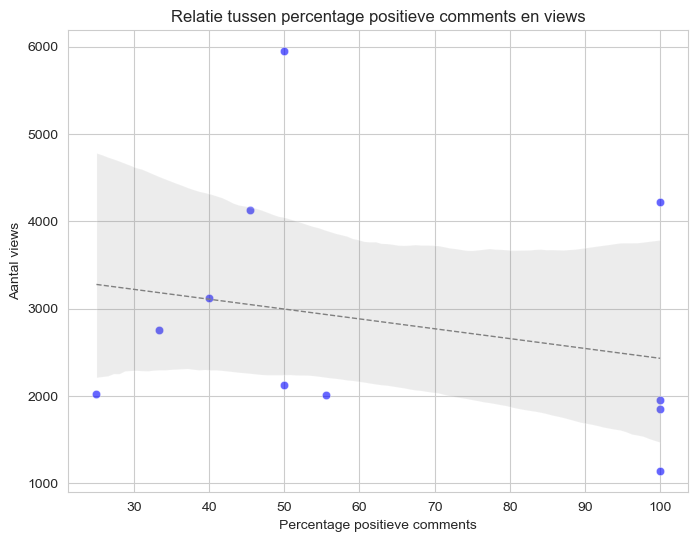

In [8]:
# Scatterplot met regressielijn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=videos['percentage_positief'], y=videos['views'], color='blue', alpha=0.6)
sns.regplot(x=videos['percentage_positief'], y=videos['views'], scatter=False, color='gray', line_kws={'linestyle': 'dashed', 'linewidth': 1})
plt.title("Relatie tussen percentage positieve comments en views")
plt.xlabel("Percentage positieve comments")
plt.ylabel("Aantal views")
plt.show()

In [9]:
# Spearman’s Rangcorrelatie**
correlation, p_value = stats.spearmanr(videos['percentage_positief'], videos['views'])
print(f"Spearman correlatie: {correlation}, p-waarde: {p_value}")

Spearman correlatie: -0.40572780287003823, p-waarde: 0.215693365287438


1.	Spearman Correlatie = -0.406
    - Dit wijst op een matige negatieve correlatie tussen het percentage positieve comments en het aantal views.
    - Natief verband betekent: hoe meer positieve comments, hoe minder views (wat contra-intuïtief lijkt).
2. p-waarde = 0.216
    - Dit is veel groter dan 0.05, wat betekent dat de correlatie niet statistisch significant is.
    - Er is geen overtuigend bewijs dat video’s met een hoger percentage positieve comments ook meer views krijgen.

In [10]:
videos

,id,title,publish_date,duration,views,likes,dislikes,comments,views_24h,views_1w,...,comments_2w,comments_1m,comments_2m,comments_3m,has_CTA,is_beta,university,gender,has_ambassador,percentage_positief
0,GYtUhykvOos,Is het erg als tieners bijna nooit met vriende...,2024-12-01T07:00:09Z,10:59,4127,99,2,13,1860,2682,...,4,4,4.0,4.0,False,NaN,KUL,0,True,45.45
1,PkmUT16Um_0,Hoe kan je helpen als je buur ernstig ziek is?...,2024-12-08T09:00:27Z,16:15,1953,36,0,3,851,1277,...,3,3,3.0,3.0,True,0.0,VUB,0,True,100.00
2,JxWT-zYtcGg,Hoe zorgt Trump ervoor dat we minder eenzaam z...,2024-12-10T06:00:16Z,17:01,2120,40,5,2,831,1415,...,2,2,2.0,2.0,True,0.0,UA,0,False,50.00
3,rJbiY3S69ek,Hoe kan je tijdens een superleuke vakantie toc...,2024-12-15T09:00:48Z,16:27,1136,23,1,1,560,763,...,6,6,6.0,NaN,False,NaN,VUB,0,False,100.00
4,ewUjvz3nDj4,Waarom is een vlam niet vierkant? #dww24,2024-12-17T09:00:40Z,16:46,2023,45,2,4,750,1460,...,5,5,5.0,NaN,True,1.0,UG,1,False,25.00
5,BDq4yJCRFcE,Waarom bestaat de winter?,2024-12-22T08:00:08Z,10:03,2005,52,0,9,1103,1461,...,6,6,6.0,NaN,True,1.0,UG,0,False,55.56
6,ih7RQ5lFwIY,Waarom spelen bandjes op kerstmarkten zo vals?,2024-12-24T08:00:38Z,12:00,5949,108,0,10,1534,5299,...,7,7,7.0,NaN,False,NaN,UA,1,False,50.00
7,Wm-Yk5bK_fk,Waarom is eten met een korstje lekkerder?,2024-12-29T09:00:28Z,12:48,1853,48,0,1,1003,1428,...,2,2,2.0,NaN,False,NaN,UG,1,False,100.00
8,4efyusOrx14,Helpt zebradrinken tegen een kater? #dww24,2024-12-31T09:00:04Z,13:15,2760,67,3,6,1086,2068,...,3,3,4.0,NaN,True,0.0,VUB,0,False,33.33
9,PUztndRNSU8,Is het een goed idee om te trouwen met je best...,2025-01-05T09:00:22Z,14:44,4218,104,0,4,1605,2961,...,3,3,3.0,NaN,False,NaN,UG,0,False,100.00
